# Matrix Product Analysis
## Product

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
#Product Function
def matrixProduct(A,B,n,m,k):
    C = np.zeros((n,k),dtype=int)
    for i in range(0,n):
        for j in range(0,k):
            for l in range(0,m):
                C[i][j] = C[i][j]+(A[i][l]*B[l][j])
    return C

#This is the same function but with some changes to measure time taken by operations(+,*).
def matrixProductTimes(A,B,n,m,k):
    C = np.zeros((n,k),dtype=int)
    add,multi = 0,0
    for i in range(0,n):
        for j in range(0,k):
            for l in range(0,m):
                to = time.clock()
                pr = A[i][l]*B[l][j]
                tf = time.clock()
                multi = multi + (tf-to)
                to = time.clock()
                C[i][j] = C[i][j]+pr
                tf = time.clock()
                add = add + (tf-to)
    return C,add,multi


##### Testing the function:
For this assignment we create two Matrices $A_{nxn}$ and $B_{nxn}$, where $a_{ij} = 1$ and $B_{ij} = 2$ with $1 \leq i,j \leq n$ are elements of $A_{nxn}$ and $B_{nxn}$ respectively.

In [3]:
# we define the matrix dimesion nxm for two matrix
n,m,k = 5,5,5

#Matrix A,B
A = np.ones((n,m), dtype=np.int) #n*m
B = np.full((m,k), 2) #n*k
to= time.clock()
C = matrixProduct(A,B,n,m,k)
tf= time.clock()

print ("Time> ",tf-to," seconds")
print("A = \n",A)
print("B = \n",B)
print("AB = \n",C)

Time>  0.0002409999999999357  seconds
A = 
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
B = 
 [[2 2 2 2 2]
 [2 2 2 2 2]
 [2 2 2 2 2]
 [2 2 2 2 2]
 [2 2 2 2 2]]
AB = 
 [[10 10 10 10 10]
 [10 10 10 10 10]
 [10 10 10 10 10]
 [10 10 10 10 10]
 [10 10 10 10 10]]


## Time Plot
Here we check the time taken by product, for simplicity, we consider square matrix, giving us a complexity of $O(n^3)$. If we consider non squared matrices, the complexity would be $O(n*m*k)$ because of the behaviour of the function $\textit{matrixProduct(A,B,n,m,k)}$

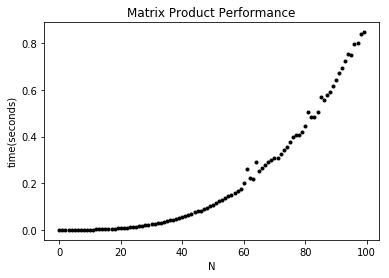

In [4]:
matrixSize = 100
sizes = np.arange(0,matrixSize)
times = np.empty(matrixSize)
for i in sizes:
    n=m=k=i
    A = np.ones((n,m), dtype=np.int) #n*m
    B = np.full((m,k), 2) #n*k
    
    to= time.clock()
    C = matrixProduct(A,B,n,m,k)
    tf= time.clock()
    times[i]=tf-to

plt.plot(sizes,times,'k.',label = 'Elapsed')
plt.title('Matrix Product Performance')
plt.xlabel('N')
plt.ylabel('time(seconds)')
plt.show()

###### We also measure the time taken by the ($+,*$) operations in the matrix product.
Note that we make an average between 10 executions.

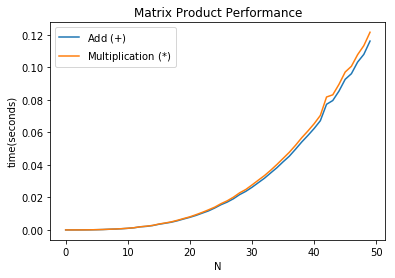

In [5]:
matrixSize = 50
sizes = np.arange(0,matrixSize)
timeAdd = np.zeros(matrixSize)
timeProd = np.zeros(matrixSize)
for i in sizes:
    n=m=k=i
    A = np.ones((n,m), dtype=np.int) #n*m
    B = np.full((m,k), 2) #n*k
    
    #Average of time
    for j in range(10):
        C,ad,pr = matrixProductTimes(A,B,n,m,k)
        timeAdd[i] += ad
        timeProd[i] += pr
    timeAdd[i]/=10.0
    timeProd[i]/=10.0
    
add, = plt.plot(sizes,timeAdd,label = 'Add $(+)$')
prod, = plt.plot(sizes,timeProd,label='Multiplication $(*)$')
plt.legend(handles=[add,prod])
plt.title('Matrix Product Performance')
plt.xlabel('N')
plt.ylabel('time(seconds)')
plt.show()

## Comparison Between Languages
###### Here, we compare the performance between 3 well known programing languages: C++, Java and Python
The general performance of the function:

In [44]:
#loading data
cppOut,javaOut,pyOut = 'Outputs/C++Out.out','Outputs/JavaOut.out','Outputs/PythonOut.out'
dtype1 = np.dtype([('n',np.int),('total',np.double),('add',np.double),('prod',np.double)]) #dtype maping

cpp = np.loadtxt(cppOut,dtype = dtype1)
jav = np.loadtxt(javaOut,dtype = dtype1)
py = np.loadtxt(pyOut,dtype = dtype1)

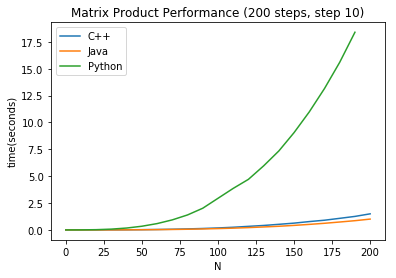

In [45]:
plCpp, = plt.plot(cpp['n'],cpp['total'],label = 'C++')
plJava, = plt.plot(jav['n'],jav['total'],label = 'Java')
plPy, = plt.plot(py['n'],py['total'],label = 'Python')
plt.legend(handles=[plCpp,plJava,plPy])
plt.title('Matrix Product Performance (200 steps, step 10)')
plt.xlabel('N')
plt.ylabel('time(seconds)')
plt.show()

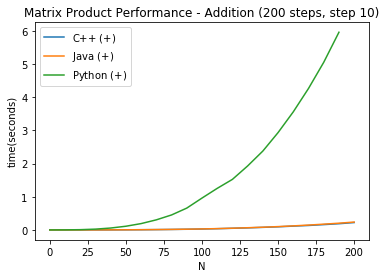

In [46]:
plCpp, = plt.plot(cpp['n'],cpp['add'],label = 'C++ $(+)$')
plJava, = plt.plot(jav['n'],jav['add'],label = 'Java $(+)$')
plPy, = plt.plot(py['n'],py['add'],label = 'Python $(+)$')
plt.legend(handles=[plCpp,plJava,plPy])
plt.title('Matrix Product Performance - Addition (200 steps, step 10)')
plt.xlabel('N')
plt.ylabel('time(seconds)')
plt.show()

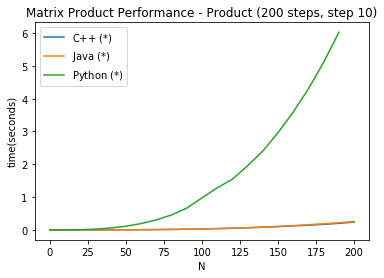

In [47]:
plCpp, = plt.plot(cpp['n'],cpp['prod'],label = 'C++ $(*)$')
plJava, = plt.plot(jav['n'],jav['prod'],label = 'Java $(*)$')
plPy, = plt.plot(py['n'],py['prod'],label = 'Python $(*)$')
plt.legend(handles=[plCpp,plJava,plPy])
plt.title('Matrix Product Performance - Product (200 steps, step 10)')
plt.xlabel('N')
plt.ylabel('time(seconds)')
plt.show()